In [3]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pyarrow.feather as feather

In [4]:
table_data = feather.read_table("C:\\Users\\bruno\\Desktop\\Diplomski\\one_df_trta_SYNC.feather")
edf = table_data.to_pandas()


In [17]:
spo2_data = edf[['SpO2']]


In [7]:
clf = IsolationForest(random_state=0, verbose=2)
clf.fit(spo2_data)

labels = clf.predict(spo2_data)


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

In [18]:
spo2_data['Anomaly'] = labels

import pandas as pd
from scipy.stats import zscore

# Assuming `df` is your DataFrame
# Calculate Z-scores
spo2_data['SpO2_zscore'] = zscore(spo2_data['SpO2'])

# Filter rows
spo2_data = spo2_data[(spo2_data['SpO2_zscore'] > -3) & (spo2_data['SpO2_zscore'] < 3)]

C:\Users\bruno\AppData\Local\Temp\ipykernel_28200\3025516513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spo2_data['Anomaly'] = labels
C:\Users\bruno\AppData\Local\Temp\ipykernel_28200\3025516513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spo2_data['SpO2_zscore'] = zscore(spo2_data['SpO2'])


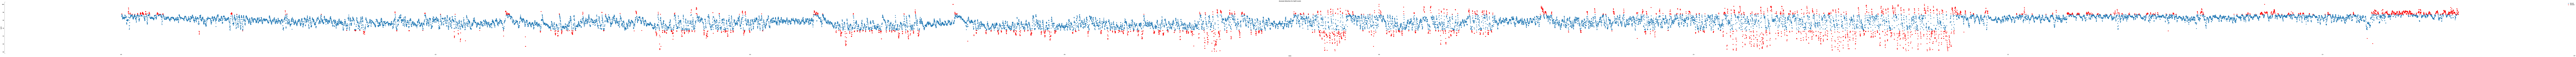

In [24]:
# Add labels to the DataFrame

# Plotting the SpO2 levels and highlighting anomalies
plt.figure(figsize=(500, 10))
plt.scatter(spo2_data.index, spo2_data['SpO2'], label='Normal')
plt.scatter(spo2_data[spo2_data['Anomaly'] == -1].index,
            spo2_data[spo2_data['Anomaly'] == -1]['SpO2'],
            color='red', label='Anomaly')
plt.legend()
plt.title('Anomaly Detection for SpO2 Levels')
plt.xlabel('Index')
plt.ylabel('SpO2')
plt.show()
